In [106]:
import numpy as np
import os 
import cv2 
import random
import seaborn as sns
from google.colab.patches import cv2_imshow
from matplotlib import pyplot as plt
from tqdm.auto import tqdm
from sklearn.cluster import KMeans
from scipy.spatial import distance
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

In [107]:
!pip install opencv-contrib-python==4.4.0.44

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [108]:
!git clone https://github.com/ardamavi/Sign-Language-Digits-Dataset.git

fatal: destination path 'Sign-Language-Digits-Dataset' already exists and is not an empty directory.


In [109]:
int(0.8*len(os.listdir('/content/Sign-Language-Digits-Dataset/Dataset/0')))

164

In [120]:
def cargar_imagen(folder):
  train = {}
  test = {}
  count = 0
  for foldername in os.listdir(folder):
    categoria1=[]
    categoria2=[]
    count = 0 
    ruta = folder + '/' + foldername 
    for filename in os.listdir(ruta):
      img = cv2.imread(ruta + '/' + filename, cv2.IMREAD_GRAYSCALE)
      count += 1
      if img is not None:
        if count <= int(0.8*len(os.listdir(ruta))):
          categoria1.append(img)
        else:
          categoria2.append(img)

    train[foldername] = categoria1
    test[foldername] = categoria2

  return train,test

def sift_feat(imagenes):
  sift = cv2.SIFT_create()
  sift_featXcat = {}
  sift_feat_all = []
  for key, value in imagenes.items():
    featXcat = []
    for img in value:
      kp,desc = sift.detectAndCompute(img, None)
      sift_feat_all.extend(desc)
      featXcat.append(desc)
    sift_featXcat[key] = featXcat
  return [sift_feat_all, sift_featXcat]

def kmeans(k,lista):
  kmeans = KMeans(n_clusters=k)
  kmeans.fit(lista)
  visual_words = kmeans.cluster_centers_
  return visual_words

def find_idx(feat,center):
  count=0
  ind=0
  for i in range(len(center)):
    if(i==0):
      count = distance.euclidean(feat,center[i])
    else:
      dist = distance.euclidean(feat,center[i])
      if (dist<count):
        ind = i
        count = dist
    return ind

def img_clases(bovw_feat,centers):
  dict_feat = {}
  for key, value in bovw_feat.items():
    imagens = []
    for img in value:
      histo = np.zeros(len(centers))
      for each_feat in img:
        idx = find_idx(each_feat,centers)
        histo[idx] += 1
      imagens.append(histo)
    dict_feat[key] = imagens
  return dict_feat

def preparar_datos(diccio):
  y=[]
  x=[]
  for key, values in diccio.items():
    for histo in values:
      x.append(histo)
      y.append(key)
  return np.array(x), np.array(y)

In [121]:
etiquetas = os.listdir('/content/Sign-Language-Digits-Dataset/Dataset')
print(etiquetas)

['7', '0', '2', '6', '9', '1', '4', '8', '3', '5']


In [122]:
imagenes_color = []
imagenes_gray = []
labels = []
extencion = '/content/Sign-Language-Digits-Dataset/Dataset'

for categorias in etiquetas:
  print("Leyendo categoria: ", categorias)
  class_num = categorias
  ruta = os.path.join(extencion,categorias)
  print(ruta)
  for img in tqdm(os.listdir(ruta)):
    img_array = cv2.imread(os.path.join(ruta,img))
    img_gray = cv2.cvtColor(img_array,cv2.COLOR_BGR2GRAY)
    img_color = cv2.cvtColor(img_array,cv2.COLOR_BGR2RGB)

    new_array_gray = cv2.resize(img_gray,(64,64))
    new_array_color = cv2.resize(img_color,(64,64))
    imagenes_gray.append(new_array_gray)
    imagenes_color.append(new_array_color)
    labels.append(class_num)

Leyendo categoria:  7
/content/Sign-Language-Digits-Dataset/Dataset/7


  0%|          | 0/206 [00:00<?, ?it/s]

Leyendo categoria:  0
/content/Sign-Language-Digits-Dataset/Dataset/0


  0%|          | 0/205 [00:00<?, ?it/s]

Leyendo categoria:  2
/content/Sign-Language-Digits-Dataset/Dataset/2


  0%|          | 0/206 [00:00<?, ?it/s]

Leyendo categoria:  6
/content/Sign-Language-Digits-Dataset/Dataset/6


  0%|          | 0/207 [00:00<?, ?it/s]

Leyendo categoria:  9
/content/Sign-Language-Digits-Dataset/Dataset/9


  0%|          | 0/204 [00:00<?, ?it/s]

Leyendo categoria:  1
/content/Sign-Language-Digits-Dataset/Dataset/1


  0%|          | 0/206 [00:00<?, ?it/s]

Leyendo categoria:  4
/content/Sign-Language-Digits-Dataset/Dataset/4


  0%|          | 0/207 [00:00<?, ?it/s]

Leyendo categoria:  8
/content/Sign-Language-Digits-Dataset/Dataset/8


  0%|          | 0/208 [00:00<?, ?it/s]

Leyendo categoria:  3
/content/Sign-Language-Digits-Dataset/Dataset/3


  0%|          | 0/206 [00:00<?, ?it/s]

Leyendo categoria:  5
/content/Sign-Language-Digits-Dataset/Dataset/5


  0%|          | 0/207 [00:00<?, ?it/s]

In [123]:
x_train = np.array(imagenes_gray)
y_train = np.array(labels)

<function matplotlib.pyplot.show(close=None, block=None)>

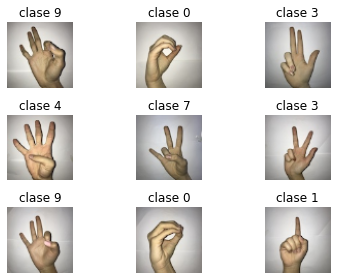

In [124]:
fig, ax = plt.subplots(3,3)
[axi.set_axis_off() for axi in ax.ravel()]
ax = ax.flatten()
for i in ax:
  num =random.randint(0,len(imagenes_color))
  i.imshow(imagenes_color[num],cmap='gray')
  i.set_title("clase {}".format(y_train[num]))

plt.tight_layout()
plt.show

16


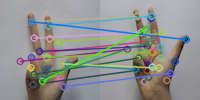

In [125]:
img = cv2.imread('/content/Sign-Language-Digits-Dataset/Dataset/3/IMG_1172.JPG')
img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
img2 = cv2.imread('/content/Sign-Language-Digits-Dataset/Dataset/3/IMG_1242.JPG')
img_gray2 = cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)
sift = cv2.SIFT_create()
kp1,desc1 = sift.detectAndCompute(img_gray,None)
kp2,desc2 = sift.detectAndCompute(img_gray2,None)

fbm = cv2.BFMatcher(cv2.NORM_L2,crossCheck=True)
matches = fbm.match(desc1,desc2)
matches = sorted(matches,key=lambda x:x.distance)
print(len(matches))
result = cv2.drawMatches(img,kp1,img2,kp2,matches[:30],None)
cv2_imshow(result)

In [126]:
train, test = cargar_imagen(extencion)

In [127]:
print(train.keys())

dict_keys(['7', '0', '2', '6', '9', '1', '4', '8', '3', '5'])


In [128]:
print(test.keys())

dict_keys(['7', '0', '2', '6', '9', '1', '4', '8', '3', '5'])


In [129]:
sifts = sift_feat(train)

feat_all = sifts[0]
train_bovw_feat = sifts[1] 

In [130]:
visual_words = kmeans(50,feat_all)
print(visual_words.shape)

(50, 128)


In [131]:
bovw_train = img_clases(train_bovw_feat, visual_words)
x_train, y_train = preparar_datos(bovw_train)

In [132]:
print(x_train.shape)
print(y_train.shape)

(1644, 50)
(1644,)


In [133]:
test_bovw_feat = sift_feat(test)[1]

In [134]:
bovw_test = img_clases(test_bovw_feat,visual_words)

In [135]:
x_test, y_test = preparar_datos(bovw_test)

In [136]:
print(x_test.shape)
print(y_test.shape)

(418, 50)
(418,)


In [137]:
std = StandardScaler().fit(x_train)
x_train = std.transform(x_train)
x_test = std.transform(x_test)

In [138]:
mlp = MLPClassifier(hidden_layer_sizes=(80,5), activation='relu', solver='adam', max_iter=500 )
mlp.fit(x_train,y_train)

MLPClassifier(hidden_layer_sizes=(80, 5), max_iter=500)

In [139]:
p = mlp.predict(x_test)

In [140]:
acc = accuracy_score(y_test,p)
print(str(acc))

0.1291866028708134


In [141]:
cm = confusion_matrix(y_test,p, labels=mlp.classes_)

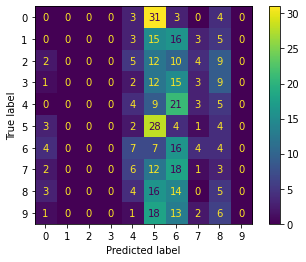

In [142]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=mlp.classes_)
disp.plot()
plt.show()